In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import *
import datetime
zxynb = 1

In [15]:
def rotateImage(img, degree, pt1, pt2, pt3, pt4):
  height, width = img.shape[:2]
  heightNew = int(width * fabs(sin(radians(degree))) +
                  height * fabs(cos(radians(degree))))
  widthNew = int(height * fabs(sin(radians(degree))) +
                 width * fabs(cos(radians(degree))))
  matRotation = cv2.getRotationMatrix2D((width//2, height//2), degree, 1)
  #matRotation[0, 2] += (widthNew - width) / 2
  #matRotation[1, 2] += (heightNew - height) / 2
  imgRotation = cv2.warpAffine(
      img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
#   plt.imshow(imgRotation)
  imgRoation = cv2.resize(imgRotation,(50,50),interpolation=cv2.INTER_CUBIC)
  #cv2.imshow("imgRotation", imgRotation)
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()
  pt1 = list(pt1)
  pt3 = list(pt3)
  [[pt1[0]], [pt1[1]]] = np.dot(
      matRotation, np.array([[pt1[0]], [pt1[1]], [1]]))
  [[pt3[0]], [pt3[1]]] = np.dot(
      matRotation, np.array([[pt3[0]], [pt3[1]], [1]]))
  xmax = int(pt1[1])
  xmin = int(pt3[1])
  if(int(pt3[1])>xmax):
    xmax = int(pt3[1])
    xmin = int(pt1[1])
  ymax = int(pt1[0])
  ymin = int(pt3[0])
  if(int(pt3[0])>ymax):
    ymax = int(pt3[0])
    ymin = int(pt1[0])
#   plt.imshow(im)
#   plt.imshow(imgOut)
  imgOut = imgRotation[xmin:xmax, ymin:ymax]
  imgOut = cv2.resize(imgOut, (500, 500))
  now = datetime.datetime.now()
  global zxynb
  filename = str(now.strftime("%d-%H-%M-%S"))
  num_of_pages = str(zxynb)
  filename = './'+filename + '_'+ num_of_pages +'.jpg'
  cv2.imwrite(filename, imgOut)
  print(filename)
  zxynb = zxynb+1
#   cv2.imshow("imgOut", imgOut)  # 裁减得到的旋转矩形框
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()
  #cv2.imwrite("imgOut.jpg", imgOut)
  # pt2 = list(pt2)
  # pt4 = list(pt4)
  # [[pt2[0]], [pt2[1]]] = np.dot(matRotation, np.array([[pt2[0]], [pt2[1]], [1]]))
  # [[pt4[0]], [pt4[1]]] = np.dot(matRotation, np.array([[pt4[0]], [pt4[1]], [1]]))
  # pt1 = (int(pt1[0]), int(pt1[1]))
  # pt2 = (int(pt2[0]), int(pt2[1]))
  # pt3 = (int(pt3[0]), int(pt3[1]))
  # pt4 = (int(pt4[0]), int(pt4[1]))
  # drawRect(imgRotation,pt1,pt2,pt3,pt4,(255,0,0),2)
  return imgRotation

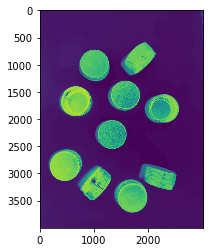

In [3]:
origin = cv2.imread("./resource/1.jpg")
hsv = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)

lower_blue = np.array([10,50,50])
upper_blue = np.array([180,255,255])
mask = cv2.inRange(hsv,lower_blue,upper_blue)
img = cv2.resize(mask,(300,300))
h,s,v = cv2.split(hsv)
plt.imshow(s)

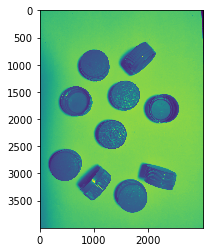

In [4]:
gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray = s

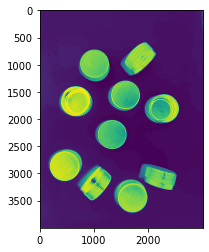

In [5]:
sblur = cv2.blur(s,(15,15))
plt.imshow(sblur)

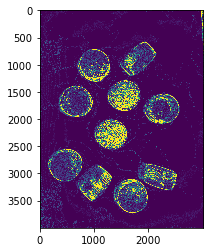

In [6]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

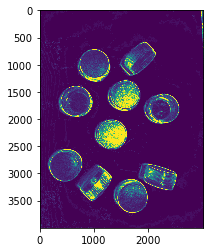

In [7]:
blurred = cv2.medianBlur(gradient, 9)
plt.imshow(blurred)

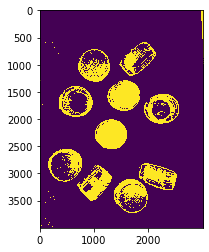

In [8]:
(_, thresh) = cv2.threshold(blurred, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

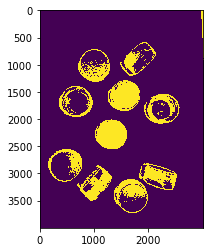

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
cl = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cl)

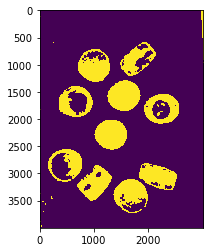

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=8)
closed = cv2.dilate(closed, None, iterations=8)
plt.imshow(closed)

--------------
./19-23-43-41:_21.jpg
--------------
./19-23-43-41:_22.jpg
--------------
./19-23-43-41:_23.jpg
--------------
./19-23-43-41:_24.jpg
--------------
./19-23-43-42:_25.jpg
--------------
./19-23-43-42:_26.jpg
--------------
./19-23-43-42:_27.jpg
--------------
./19-23-43-42:_28.jpg
--------------
./19-23-43-42:_29.jpg
--------------
./19-23-43-42:_30.jpg
10
[902, 691, 688, 963, 602, 676, 638, 690, 654, 935]


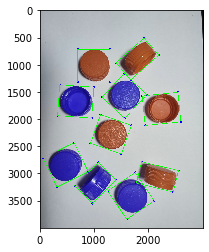

In [16]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
ct = 0
ls = []
res = np.copy(origin)
for c in cnts:
    if len(c) <= 200:
        continue
#     print(c)
    ct = ct + 1
    ls.append(len(c))
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    print("--------------")
    #print(-degrees(atan2(box[1][1]-box[0][1],box[1][0]-box[0][0])))
    imgRotation = rotateImage(origin, -degrees(atan2(box[1][0]-box[0][0],box[1][1]-box[0][1])), box[0], box[1], box[2], box[3])
    point_color = (0, 0, 255)
    for i in box:
        res = cv2.circle(res,(i[0],i[1]),15,point_color,8)
    # draw a bounding box arounded the detected barcode and display the image
    res = cv2.drawContours(res, [box], -1, (0, 255, 0), 10)
plt.imshow(res)
print(ct)
print(ls)

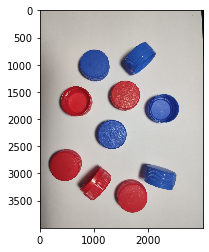

In [12]:
plt.imshow(cv2.cvtColor(origin,cv2.COLOR_BGR2RGB))